### Statistical Analysis of Fire Intensity Model (Clean) Data Set

### First Step - Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt, time
import matplotlib.mlab as mlab
import matplotlib.style as stl
import matplotlib.image as mpimg
from numpy import median
from numpy.random import randn
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

sns.set(style="ticks", color_codes=True)

%matplotlib inline

### Second Step - Loading and Checking the Data - Limiting Sample

In [2]:
# Load Fire Intensity Model CSV File
emstat = pd.read_csv('FireIntensity_Model_June12_Clean.csv').sample(250000)

In [3]:
# Use pandas to view the first 5 rows of the file
emstat.head(5)

,Unnamed: 0,latitude,longitude,doy,month,year,cluster_reference,fire_region,season,covertype,...,visibility,wind_speed,wind_gust,brightness,fire_intensity,fire_intensity_twocat,fire_intensity_threecat,fire_intensity_fourcat,bright_t31,frp
22318,22318,37.2558,-96.0348,104,4,2003,2003_1737,3,0,1,...,9.997000,18.96,27.50,326.0,High,Moderate,Low,Low,305.7,17.2
413259,413259,37.5315,-96.7246,92,4,2007,2007_302,3,0,1,...,9.997000,14.03,22.45,313.5,Medium,Moderate,Low,Low,298.0,31.0
704828,704828,32.2675,-88.6347,292,10,2009,2009_4484,0,2,3,...,9.997000,3.20,5.16,310.6,Medium,Moderate,Low,Low,289.8,12.6
679288,679288,33.6028,-90.2398,160,6,2009,2009_5325,0,0,3,...,9.216293,5.62,10.01,325.6,High,Moderate,Low,Low,300.1,23.9
1204093,1204093,31.7385,-88.4382,279,10,2014,2014_6151,0,2,3,...,9.997000,10.39,16.16,326.5,High,Moderate,Low,Low,290.7,68.9


In [4]:
# What are the dtypes of the columns?
emstat.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 22318 to 1014930
Data columns (total 26 columns):
Unnamed: 0                 250000 non-null int64
latitude                   250000 non-null float64
longitude                  250000 non-null float64
doy                        250000 non-null int64
month                      250000 non-null int64
year                       250000 non-null int64
cluster_reference          250000 non-null object
fire_region                250000 non-null int64
season                     250000 non-null int64
covertype                  250000 non-null int64
fuelcode                   250000 non-null int64
prefire_fuel               250000 non-null float64
fuel_moisture_class        250000 non-null int64
temperature                250000 non-null float64
humidity                   250000 non-null float64
precip_intensity           250000 non-null float64
visibility                 250000 non-null float64
wind_speed                 250000 no

In [5]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*emstat.shape))

250000 instances with 26 features



In [6]:
# Checking to see how many years comprise the file
print(emstat['year'].unique())

[2003 2007 2009 2014 2004 2010 2011 2006 2013 2008 2005 2012 2015]


In [7]:
# Reduce columns to focus on most important features
emstat = emstat.drop(columns=['Unnamed: 0','visibility','precip_intensity','fuel_moisture_class','doy','fire_region'])

In [8]:
emstat.shape

(250000, 20)

### Description of Top-Level Key Statistics

In [9]:
# Use pandas to get the summary statistics on the data
emstat.describe()

,latitude,longitude,month,year,season,covertype,fuelcode,prefire_fuel,temperature,humidity,wind_speed,wind_gust,brightness,bright_t31,frp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,37.066244,-99.438770,6.577812,2009.058152,1.336252,2.347812,831.050036,3858.908914,69.942297,0.410770,6.364845,11.684127,323.874406,295.833633,58.630285
std,5.852059,13.988883,3.057052,3.657364,1.047335,0.878982,708.950751,3007.667973,15.023115,0.168436,4.137208,6.045779,22.269726,9.538449,181.357127
min,24.723800,-124.600200,1.000000,2003.000000,0.000000,1.000000,1.000000,19.615050,-9.700000,0.030000,0.000000,0.000000,300.000000,265.000000,0.000000
25%,32.392475,-114.153950,4.000000,2006.000000,0.000000,1.000000,1.000000,321.350562,60.610000,0.290000,3.540000,7.460000,309.800000,290.200000,10.200000
50%,35.914700,-96.248400,7.000000,2009.000000,1.000000,3.000000,1160.000000,4335.068543,70.390000,0.400000,5.430000,10.900000,317.900000,295.400000,20.400000
75%,41.632900,-87.782875,9.000000,2012.000000,2.000000,3.000000,1280.000000,6989.973251,79.540000,0.530000,8.100000,14.420000,330.200000,300.800000,47.200000
max,48.992400,-67.004200,12.000000,2015.000000,3.000000,3.000000,2950.000000,13337.510830,139.550000,1.000000,66.300000,137.970000,506.500000,400.100000,13228.900000


### Identifying Most Important Features

In [10]:
# A look at what the cover type looks like - with the rankings from 1 (low) to 3 (highest)
emstat['covertype'].value_counts()

3    155174
1     68221
2     26605
Name: covertype, dtype: int64

In [11]:
# A look at what the cover type looks like - with the rankings from 1 (low) to 2900 (highest)
emstat['fuelcode'].value_counts()

1       69927
1160    33865
2       27201
1500    25507
1200    16777
1140    14591
1220    10671
1370    10114
1260     8284
1600     6573
1400     6047
1180     4627
1280     4004
2700     3771
1920     2983
2900     1590
1800     1162
1900      542
1100      324
1300      274
2180      205
1360      188
1120      179
2950      118
1950      115
1940      110
1910       79
1320       77
1340       39
1700       38
1980       16
1990        2
Name: fuelcode, dtype: int64

In [12]:
# Show the data by cover type
print(emstat.groupby('covertype').count())

           latitude  longitude   month    year  cluster_reference  season  \
covertype                                                                   
1             68221      68221   68221   68221              68221   68221   
2             26605      26605   26605   26605              26605   26605   
3            155174     155174  155174  155174             155174  155174   

           fuelcode  prefire_fuel  temperature  humidity  wind_speed  \
covertype                                                              
1             68221         68221        68221     68221       68221   
2             26605         26605        26605     26605       26605   
3            155174        155174       155174    155174      155174   

           wind_gust  brightness  fire_intensity  fire_intensity_twocat  \
covertype                                                                 
1              68221       68221           68221                  68221   
2              26605       2

In [13]:
# These features all increase with each other - no inverse relationships
emstat[['wind_speed', 'wind_gust', 'brightness', 'bright_t31']].agg(['mean','min','max'])

,wind_speed,wind_gust,brightness,bright_t31
mean,6.364845,11.684127,323.874406,295.833633
min,0.000000,0.000000,300.000000,265.000000
max,66.300000,137.970000,506.500000,400.100000


### Fire Intensity Categories Measured Against Data Set Features

In [14]:
# Show the data by fire_intensity 
print(emstat.groupby('fire_intensity').count())

                latitude  longitude  month   year  cluster_reference  season  \
fire_intensity                                                                 
High               62920      62920  62920  62920              62920   62920   
Low                62577      62577  62577  62577              62577   62577   
Medium             61882      61882  61882  61882              61882   61882   
Severe             62621      62621  62621  62621              62621   62621   

                covertype  fuelcode  prefire_fuel  temperature  humidity  \
fire_intensity                                                             
High                62920     62920         62920        62920     62920   
Low                 62577     62577         62577        62577     62577   
Medium              61882     61882         61882        61882     61882   
Severe              62621     62621         62621        62621     62621   

                wind_speed  wind_gust  brightness  fire_intens

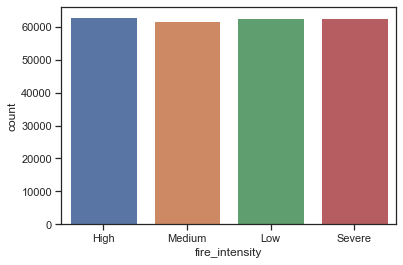

In [15]:
# Fire Intensity by category
sns.countplot(emstat['fire_intensity'],label="Count")
plt.show()

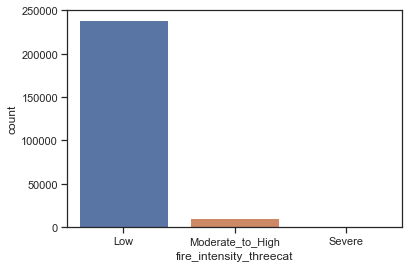

In [16]:
sns.countplot(emstat['fire_intensity_threecat'],label="Count")
plt.show()

### Looking at Histograms illustrating key Fire Intensity features

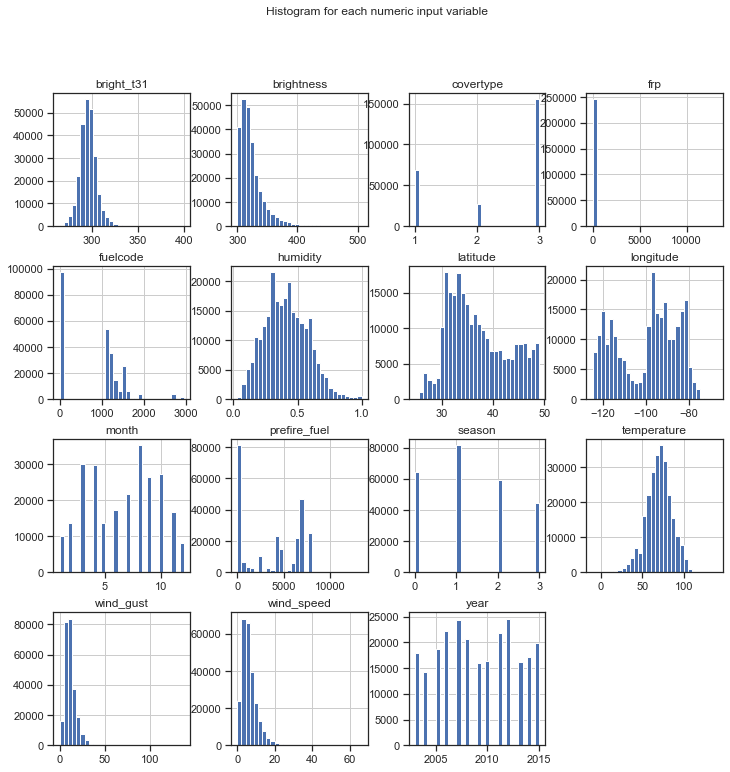

In [17]:
# Historgram of all numerical data
emstat.hist(bins=30, figsize=(12,12))
plt.suptitle("Histogram for each numeric input variable")
plt.show()

### Limiting the dataset again - this time within the state of California for processing efficiency
#### * This step reduces the number of instances from 250,000 to 61,234 

In [18]:
# Limiting data to state of California
emstat_west = emstat[(emstat.latitude > 34) & (emstat.longitude < -114)]

In [19]:
# Did we reduce the size of the data?
emstat_west.shape

(61343, 20)

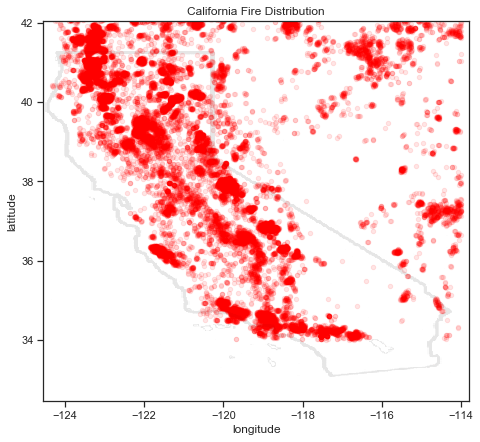

In [20]:
# California Fire Distribution Map

california_img=mpimg.imread('CaliforniaMapOutline.gif')
emstat_west.plot(kind="scatter", x="longitude", y="latitude", c= "red", figsize=(10,7), alpha=0.1)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.1)
plt.title('California Fire Distribution') 
plt.show()

### Following three (3) Pair Plots showing pairwise relationships between three select primary features

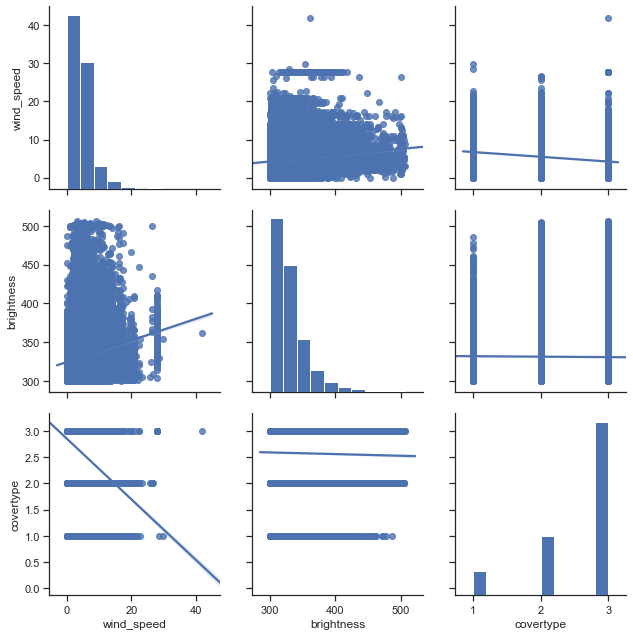

In [21]:
# Pairplot Analysis Part 1
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','brightness','covertype'], kind="reg")

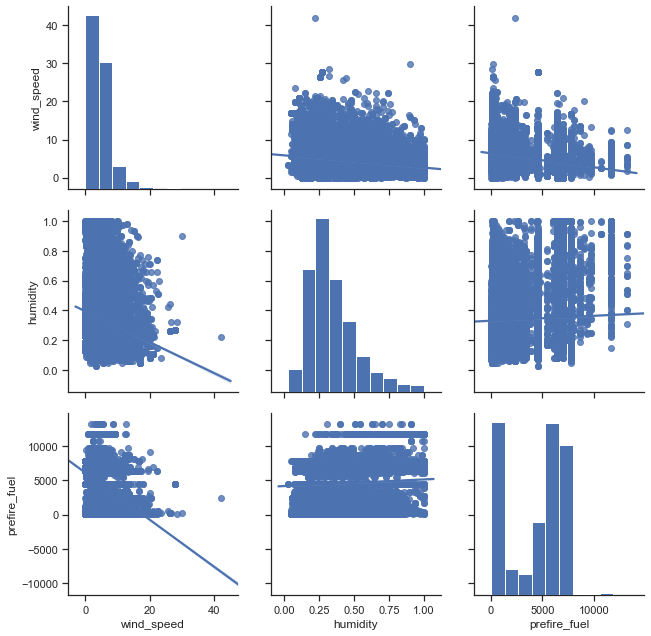

In [22]:
# Pairplot Analysis Part 2
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','humidity','prefire_fuel'], kind="reg")

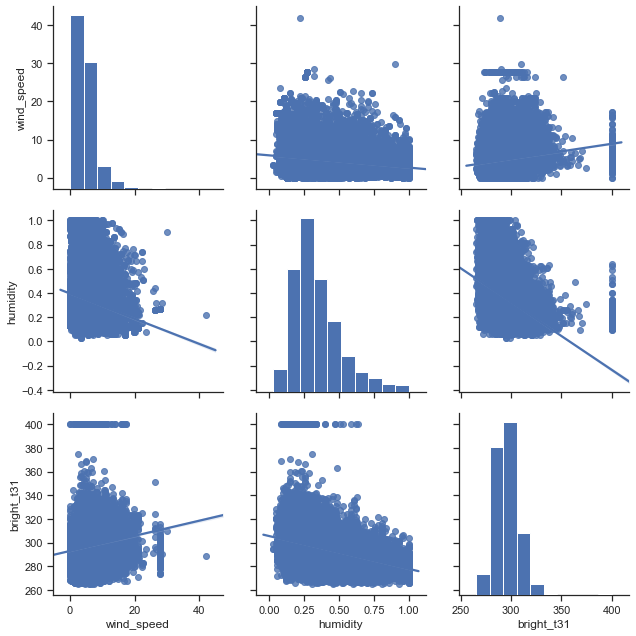

In [23]:
# Pairplot Analysis Part 3
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','humidity','bright_t31'], kind="reg")

### Statistical Correlation of Fire Intensity Measures of Performance

#### * The group indicated that humidity, wind speed, prefire-fuel, brightness, and cover type are the preferred features

In [24]:
# Correlation Analysis of key intensity indicators part 1
x_values = emstat_west['humidity']
y_values = emstat_west['wind_speed']
z_values = emstat_west['prefire_fuel']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of humidity and windspeed: {r_squared1:.9f}")
print(f"R2 Correlation of humidity and prefire_fuel: {r_squared2:.9f}")
print(f"R2 Correlation of wind_speed and prefire_fuel: {r_squared3:.9f}")

R2 Correlation of humidity and windspeed: 0.033583952
R2 Correlation of humidity and prefire_fuel: 0.003215972
R2 Correlation of wind_speed and prefire_fuel: 0.126732007


In [25]:
# Correlation Analysis of key intensity indicators part 2
x_values = emstat_west['fuelcode']
y_values = emstat_west['bright_t31']
z_values = emstat_west['wind_gust']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of fuelcode and bright_t31: {r_squared1:.9f}")
print(f"R2 Correlation of fuelcode and wind_gust: {r_squared2:.9f}")
print(f"R2 Correlation of bright_t31 and wind_gust: {r_squared3:.9f}")

R2 Correlation of fuelcode and bright_t31: 0.032489226
R2 Correlation of fuelcode and wind_gust: 0.070938819
R2 Correlation of bright_t31 and wind_gust: 0.026222377


### Visualizing the distribution with five Kernal Density Estimates

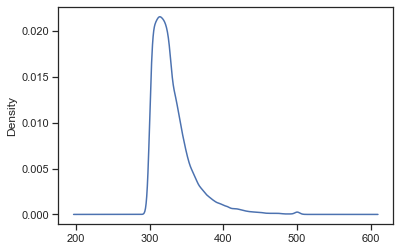

In [26]:
emstat_west['brightness'].plot(kind='kde')

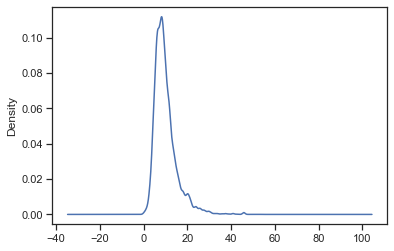

In [27]:
emstat_west['wind_gust'].plot(kind='kde')

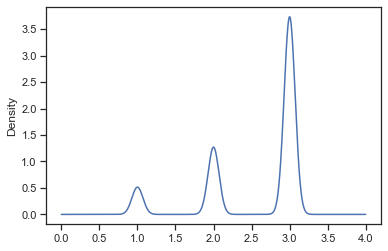

In [28]:
emstat_west['covertype'].plot(kind='kde')

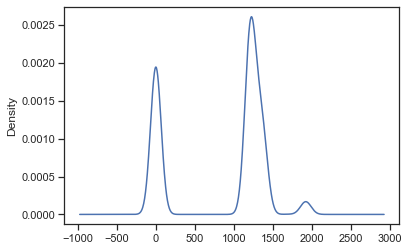

In [29]:
emstat_west['fuelcode'].plot(kind='kde')

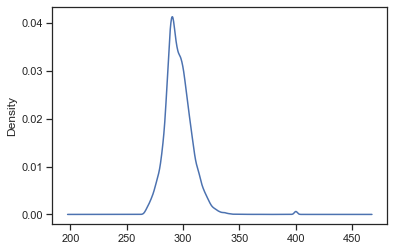

In [30]:
emstat_west['bright_t31'].plot(kind='kde')

### Scatter Plot Matrix to show multiple visualizations between fire intensity features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2C0D30AC8>,
      dtype=object)

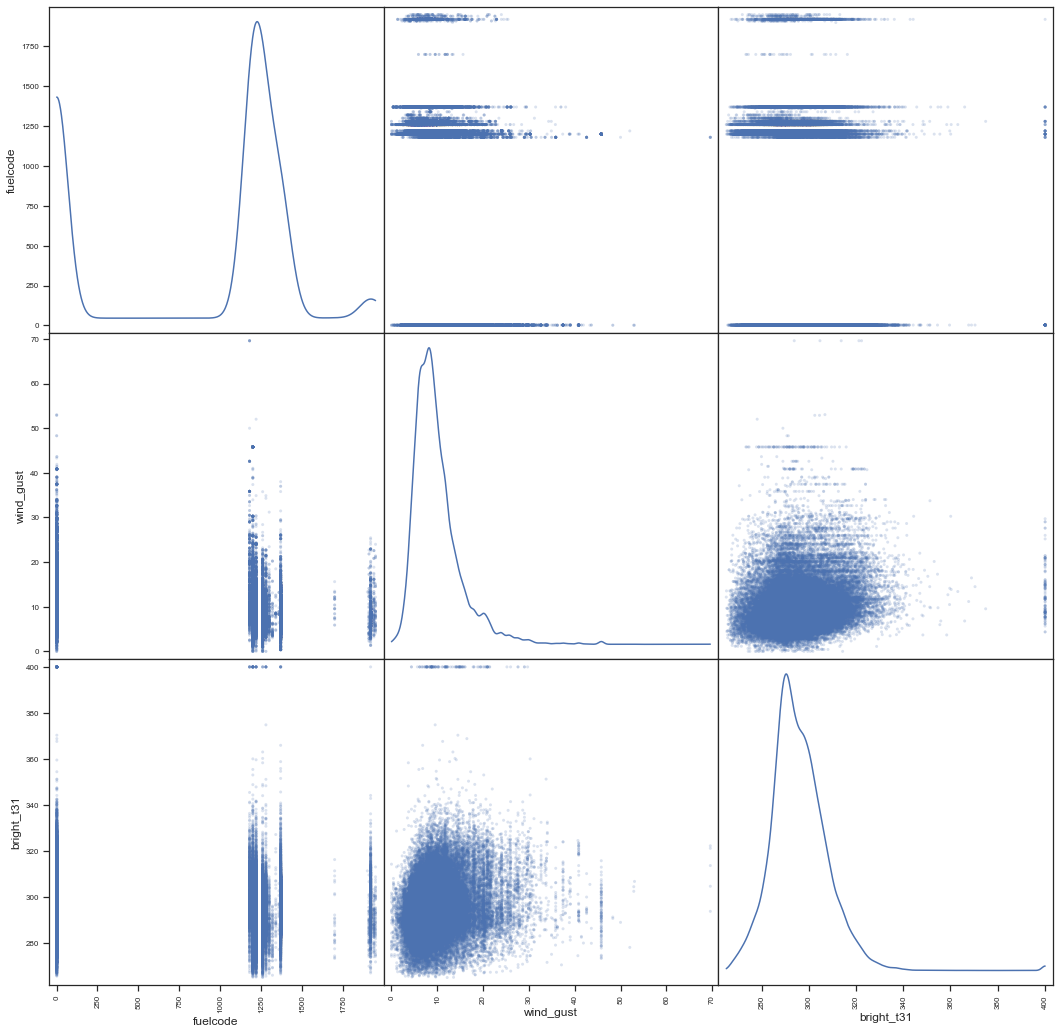

In [31]:
areas = emstat_west[['fuelcode','wind_gust','bright_t31']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

### Following Joint Plots shows pairwise relationships between two alternating features

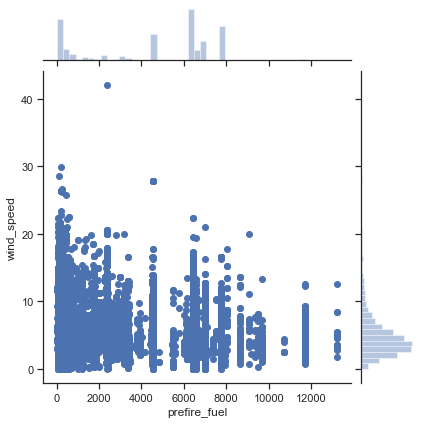

In [32]:
g = sns.jointplot("prefire_fuel", "wind_speed", emstat_west)

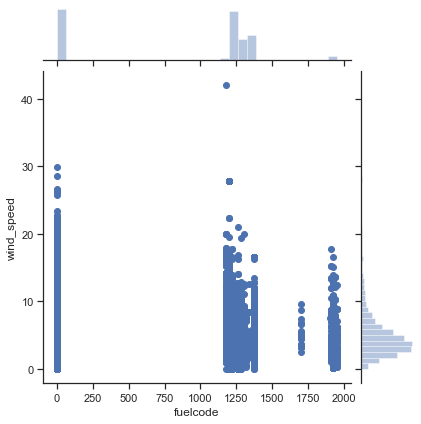

In [33]:
g = sns.jointplot("fuelcode", "wind_speed", emstat_west)

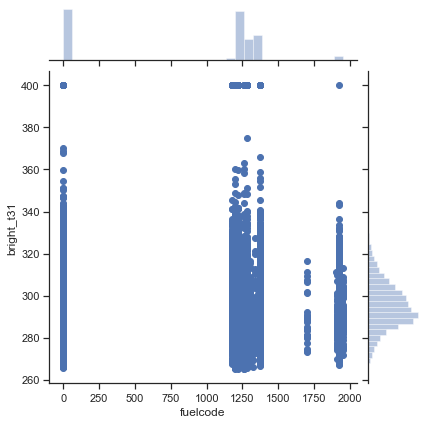

In [34]:
g = sns.jointplot("fuelcode", "bright_t31", emstat_west)

### Following Regression Plot shows multivariate relationships between pairings of the dataset features

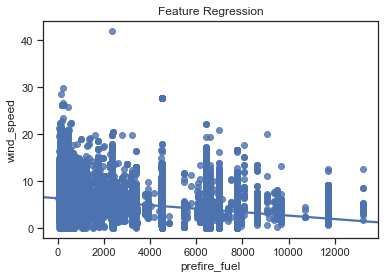

In [35]:
sns.regplot(x="prefire_fuel", y="wind_speed", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

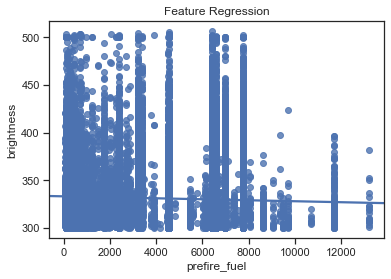

In [36]:
sns.regplot(x="prefire_fuel", y="brightness", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

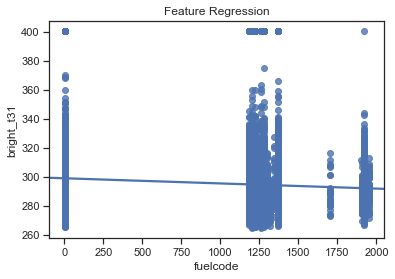

In [37]:
sns.regplot(x="fuelcode", y="bright_t31", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

### Following Violin Plot shows variable distribution between bright_t31 and fire intensity 3 category

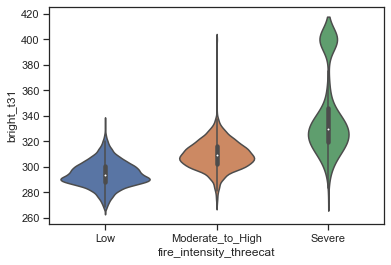

In [38]:
 ax = sns.violinplot(x="fire_intensity_threecat", y="bright_t31", data=emstat_west)